In [11]:
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Javascript

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# countries = world.loc[world['continent'] == 'South America', 'name']
countries =world['name'].sort_values()

w = widgets.Dropdown(
    options= countries,
    value='Venezuela'
)

Javascript('IPython.notebook.execute_cells_below()')

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,\
    IPython.notebook.ncells())'))

button = widgets.Button(description="Run All Cells ")
button.on_click(run_all)

display(w)
display(button)

Dropdown(index=170, options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armeni…

Button(description='Run All Cells ', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [71]:
w.value

'United States of America'

In [13]:
import os
import zipfile
import requests
import time
#import shapefile

from geopy.geocoders import Nominatim
geolocator = Nominatim()


import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# custom modules
import map_html
import cal_zoom
from cal_zoom import get_zoom_start

import warnings
warnings.filterwarnings('ignore')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [14]:
def make_folder_name(localtime):
    if localtime.tm_hour > 12:
        string = str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'_'+\
        str(localtime.tm_hour-12)+'_'+str(localtime.tm_min)+'_pm'
    else:
        string =str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'_'+\
        str(localtime.tm_hour)+'_'+str(localtime.tm_min)+'_am'
    return string

In [15]:
# names of the datasets an their respective links
names = ['24hrVIIRS375m ','48hrVIIRS375m ','7dVIIRS375m ']

In [16]:
links = ['https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_Global_24h.zip',\
        'https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_Global_48h.zip',\
        'https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_Global_7d.zip']

# links = ['https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_South_America_24h.zip',\
#         'https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_South_America_48h.zip',\
#         'https://firms.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/shapes/zips/J1_VIIRS_C2_South_America_7d.zip']

In [17]:
folder_names = []
localtime = time.localtime(time.time())

In [18]:
# save the data into the right spot
# go through each and link
for i, name_Link in enumerate(zip(names, links)):
    # download the file content in binary format
    r = requests.get(name_Link[1])
    
    # open method to open a file on your system and write the contents
    with open(name_Link[0], "wb") as code:
        code.write(r.content)
    # Unzip the data
    zip_ref = zipfile.ZipFile(name_Link[0], 'r')
    name = make_folder_name(localtime)+'_'+name_Link[0]
    folder_names.append(name)
    zip_ref.extractall(name)
    zip_ref.close()

In [19]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# sa = world.loc[world['continent'] == 'South America', 'name']

In [20]:
# import ipywidgets as widgets
# from IPython.display import display

In [21]:
# w = widgets.Dropdown(
#     options= sa,
#     value='Venezuela'
# )

# # def on_change(change):
# #     if change['type'] == 'change' and change['name'] == 'value':
# #         print ("changed to %s" % change['new'])

# # w.observe(on_change)

# display(w)

In [22]:
# w.value

In [23]:
# from IPython.display import Javascript
# Javascript('IPython.notebook.execute_cells_below()')

# def run_all(ev):
#     display(Javascript('IPython.notebook.execute_cells_below()'))

# button = widgets.Button(description="Create next input")
# button.on_click(run_all)
# display(button)

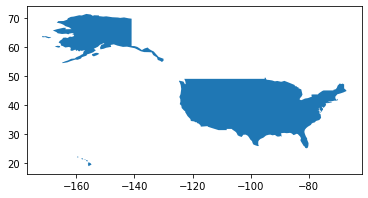

In [72]:
study_area = world[world['name'] == w.value]
study_area.plot()

In [25]:
dir_name_24h = folder_names[0]
filename_24h = 'J1_VIIRS_C2_Global_24h.shp'
path_24h = os.path.join(dir_name_24h, filename_24h)

In [26]:
dir_name_48h = folder_names[1]
filename_48h = 'J1_VIIRS_C2_Global_48h.shp'
path_48h = os.path.join(dir_name_48h, filename_48h)

In [27]:
dir_name_7d = folder_names[2]
filename_7d = 'J1_VIIRS_C2_Global_7d.shp'
path_7d = os.path.join(dir_name_7d, filename_7d)

In [44]:
def clip_data(path):
    ptall = gpd.read_file(path)
    
    ptclip = gpd.clip(ptall, study_area)
    
    return ptclip

In [73]:
pt24hclip = clip_data(path_24h)

pt48hclip = clip_data(path_48h)

pt7dclip = clip_data(path_7d)

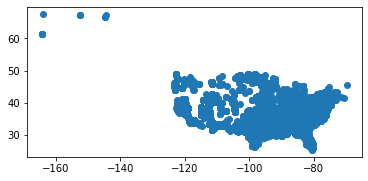

In [74]:
pt7dclip.plot()

In [75]:
def get_locations(pts):
    lats = pts['LATITUDE'].tolist()
    
    lons = pts['LONGITUDE'].tolist()
    
    locs = list(zip(lats, lons))
    
    return locs

In [76]:
pt7dclip.columns

Index(['LATITUDE', 'LONGITUDE', 'BRIGHT_TI4', 'SCAN', 'TRACK', 'ACQ_DATE',
       'ACQ_TIME', 'SATELLITE', 'CONFIDENCE', 'VERSION', 'BRIGHT_TI5', 'FRP',
       'DAYNIGHT', 'geometry'],
      dtype='object')

In [77]:
locations24h = get_locations(pt24hclip)

locations48h = get_locations(pt48hclip)

locations7d = get_locations(pt7dclip)

In [78]:
def get_popup(df):
    '''
    Function to get map popup data
    '''
    
    bt4 = df['BRIGHT_TI4'].tolist()
    acd = df['ACQ_DATE'].tolist()
    act = df['ACQ_TIME'].tolist()
    con = df['CONFIDENCE'].tolist()
    bt5 = df['BRIGHT_TI5'].tolist()
    frp = df['FRP'].tolist()
    dynt = df['DAYNIGHT']
    
    poplist = list(zip(bt4, acd, act, con, bt5, frp, dynt))
    popup = ['Brightness temperature I-4 (Kelvin): {}<br>Acquisition Date: {}<br>Acquisition Time: {}\
    <br> Confidence: {}<br>Brightness temperature I-5 (Kelvin): {}<br>Fire Radiative Power (megawatts): {}\
    <br>Day(D) or Night(N): {}'
             .format(b4, ad, at, co, b5, fr, dn) for (b4, ad, at, co, b5, fr, dn) in poplist]
    return popup

In [79]:
centx= study_area['geometry'].centroid.x.tolist()
centy= study_area['geometry'].centroid.y.tolist()
location = [*centy, *centx]

In [80]:
location

[45.70562800215178, -112.5994359115045]

In [81]:
bboxsa = study_area.geometry.bounds.values.tolist()
bbox = [item for sublist in bboxsa for item in sublist]
bbox

[-171.79111060289122, 18.91619, -66.96465999999998, 71.35776357694175]

In [82]:
# map = folium.Map(location, zoom_start=6, tiles=False,control_scale=True)
map = folium.Map(location, zoom_start=get_zoom_start(bbox), tiles=False,control_scale=True, prefer_canvas=True)


#[6.569,-65.844]
folium.TileLayer('CartoDB dark_matter', overlay=True).add_to(map)

cluster24h = MarkerCluster(name='24hr VIIRS 375m', overlay=False).add_to(map)
cluster48h = MarkerCluster(name='48hr VIIRS 375m', overlay=False).add_to(map)
cluster7d = MarkerCluster(name='7d VIIRS 375m', overlay=False).add_to(map)

pointIcon24h = "icons/fire24.png"
pointIcon48h = "icons/fire48.png"
pointIcon7d = "icons/fire7d.png"


for loc24h, pop24h in zip(locations24h, get_popup(pt24hclip)):
    folium.Marker(loc24h,
                  icon=folium.features.CustomIcon(pointIcon24h, icon_size=(40, 40)),
                  popup=pop24h
                 ).add_to(cluster24h)
    
for loc48h, pop48h in zip(locations48h, get_popup(pt48hclip)):
    folium.Marker(loc48h,
                  icon=folium.features.CustomIcon(pointIcon48h, icon_size=(40, 40)),
                  popup=pop48h               
              ).add_to(cluster48h)
    
for loc7d, pop7d in zip(locations7d, get_popup(pt7dclip)):
    folium.Marker(loc7d,
                  icon=folium.features.CustomIcon(pointIcon7d, icon_size=(40, 40)),
                  popup=pop7d
              ).add_to(cluster7d)

folium.LayerControl(collapsed=False).add_to(map)

text = 'VIIRS Active Fires in '
date = str(localtime.tm_year)+'/'+str(localtime.tm_mon)+'/'+str(localtime.tm_mday)
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(text + w.value + ' ' + 'on' + ' ' + date)   
map.get_root().html.add_child(folium.Element(title_html))

In [83]:
map_html.legend(map)

In [85]:
map

In [41]:
# # modified from: https://medium.com/@busybus/rendered-maps-with-python-ffba4b34101c
# # License: CC0 -- no rights reserved

# from math import pi, log, tan, exp, atan, log2, floor

# # Convert geographical coordinates to pixels
# # https://en.wikipedia.org/wiki/Web_Mercator_projection
# # Note on google API:
# # The world map is obtained with lat=lon=0, w=h=256, zoom=0

# # Therefore:
# ZOOM0_SIZE = 512

# # Geo-coordinate in degrees => Pixel coordinate
# def g2p(lat, lon, zoom):
#     return (
#         # x
#         ZOOM0_SIZE * (2 ** zoom) * (1 + lon / 180) / 2,
#         # y
#         ZOOM0_SIZE / (2 * pi) * (2 ** zoom) * (pi - log(tan(pi / 4 * (1 + lat / 90))))
#     )


# # Pixel coordinate => geo-coordinate in degrees
# def p2g(x, y, zoom):
#     return (
#         # lat
#         (atan(exp(pi - y / ZOOM0_SIZE * (2 * pi) / (2 ** zoom))) / pi * 4 - 1) * 90,
#         # lon
#         (x / ZOOM0_SIZE * 2 / (2 ** zoom) - 1) * 180,
#     )

# def get_map_zoom(bbox):

#     # The region of interest in geo-coordinates in degrees
#     # For example, bbox = [120.2206, 22.4827, 120.4308, 22.7578]
#     (left, bottom, right, top) = bbox

#     # Sanity check
#     assert (-90 <= bottom < top <= 90)
#     assert (-180 <= left < right <= 180)

#     # Rendered image map size in pixels as it should come from MapBox (no retina)
#     (w, h) = (1024, 1024)

#     # The center point of the region of interest
#     (lat, lon) = ((top + bottom) / 2, (left + right) / 2)

#     # Reduce precision of (lat, lon) to increase cache hits
#     snap_to_dyadic = (lambda a, b: (lambda x, scale=(2 ** floor(log2(abs(b - a) / 4))): (round(x / scale) * scale)))

#     lat = snap_to_dyadic(bottom, top)(lat)
#     lon = snap_to_dyadic(left, right)(lon)

#     assert ((bottom < lat < top) and (left < lon < right)), "Reference point not inside the region of interest"

#     # Look for appropriate zoom level to cover the region of interest
#     for zoom in range(16, 0, -1):
#         # Center point in pixel coordinates at this zoom level
#         (x0, y0) = g2p(lat, lon, zoom)

#         # The "container" geo-region that the downloaded map would cover
#         (TOP, LEFT) = p2g(x0 - w / 2, y0 - h / 2, zoom)
#         (BOTTOM, RIGHT) = p2g(x0 + w / 2, y0 + h / 2, zoom)

#         # Would the map cover the region of interest?
#         if (LEFT <= left < right <= RIGHT):
#             if (BOTTOM <= bottom < top <= TOP):
#                 break
#     return zoom